# Comparison to the previous cooldown (SIBS)

## Import needed modules

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
%matplotlib inline

## Parameters to change

### THIS IS THE ONLY PLACE YOU SHOULD NEED TO CHANGE ANYTHING

Note that this assumes that your column names in excel are the same as in the excel that is produced the previous step (FORCAST_lab_SIBS.ipynb). If this is not the case I recommend changing the excel file OR you need to change the code to function properly.

**comp_file** is the file that has the positions from the previous cooldown. You should get this from the previous results page (the excel file)

**cd_file** is the excel file from the current cooldown you are working on.

**plot_name** plot name and path for the picture that this code produces.

In [4]:
comp_file='Cooldown_results/Cooldown_76/FORCAST_pixels_LB076_20190930_final_sibspos.xlsx'
cd_file='Cooldown_results/Cooldown_77/FORCAST_pixels_LB077_20200308_TEST3_cpix.xlsx'
plot_name='Cooldown_results/Cooldown_77/LB077_comp_to_previous.png'

## Read in the excel files

In [5]:
comp=pd.read_excel(comp_file)
cool=pd.read_excel(cd_file)

### Show the tables
This is used so you can easily glance over the table that it looks correct compared to the original excel and in case you have any column names you need to change.

In [6]:
comp

,filename,aperture,dichroic,instcfgs,wavelength,x,y,fwhm,x_offset,y_offset
0,bLB076_0145.fits,multi mask,Mirror (swc),F056,5.6,129.7,129.3,2.68,1.7,1.3
1,bLB076_0147.fits,multi mask,Mirror (swc),F064,6.4,129.1,132.2,2.03,1.1,4.2
2,bLB076_0196.fits,multi mask,Dichroic,F064_Barr2,6.4,129.7,132.9,2.17,1.7,4.9
3,bLB076_0149.fits,multi mask,Mirror (swc),F077,7.7,128.7,128.6,2.08,0.7,0.6
4,bLB076_0194.fits,multi mask,Dichroic,F077_Barr2,7.7,129.1,129.5,2.23,1.1,1.5
5,bLB076_0151.fits,multi mask,Mirror (swc),F088,8.8,130.0,129.4,2.51,2.0,1.4
6,bLB076_0192.fits,multi mask,Dichroic,F088_Barr2,8.8,130.5,130.0,2.59,2.5,2.0
7,bLB076_0156.fits,multi mask,Mirror (swc),F111,11.1,128.0,128.3,2.25,0.0,0.3
8,bLB076_0188.fits,multi mask,Dichroic,F111_Barr2,11.1,128.5,128.5,2.23,0.5,0.5
9,bLB076_0154.fits,multi mask,Mirror (swc),F112,11.2,129.6,129.2,2.45,1.6,1.2


In [7]:
cool

,filename,aperture,dichroic,instcfgs,wavelength,x,y,fwhm,x_offset,y_offset
0,bLB077_0072.fits,extended grid 13-12,Mirror (swc),F056,5.6,128.9,129.5,2.47,0.9,1.5
1,bLB077_0073.fits,extended grid 13-12,Mirror (swc),F064,6.4,128.7,132.2,1.91,0.7,4.2
2,bLB077_0089.fits,extended grid 13-12,Dichroic,F064_Barr2,6.4,129.5,132.8,1.91,1.5,4.8
3,bLB077_0074.fits,extended grid 13-12,Mirror (swc),F077,7.7,128.3,128.9,2.08,0.3,0.9
4,bLB077_0090.fits,extended grid 13-12,Dichroic,F077_Barr2,7.7,128.9,129.2,2.06,0.9,1.2
5,bLB077_0075.fits,extended grid 13-12,Mirror (swc),F088,8.8,129.6,129.5,2.39,1.6,1.5
6,bLB077_0091.fits,extended grid 13-12,Dichroic,F088_Barr2,8.8,130.2,130.0,2.56,2.2,2.0
7,bLB077_0076.fits,extended grid 13-12,Mirror (swc),F111,11.1,127.4,128.0,2.14,-0.6,0.0
8,bLB077_0092.fits,extended grid 13-12,Dichroic,F111_Barr2,11.1,128.1,128.5,2.09,0.1,0.5
9,bLB077_0093.fits,extended grid 13-12,Dichroic,F112_Barr2,11.2,129.7,130.0,2.47,1.7,2.0


### Add the information to a new dataframe
Here we create a new dataframe for the data to be plotted. The column names are also changed so that the merged dataframe is easier to manipulate.

In [8]:
df_cd = cool.copy(deep=False)
df_cd = df_cd.drop(columns=['filename', 'aperture', 'dichroic', 'wavelength'])
df_comp = comp.copy(deep=False)
df_comp = df_comp.drop(columns=['filename', 'aperture', 'dichroic', 'wavelength'])
df_cd=df_cd.rename(columns={'x':'cd_x', 'y':'cd_y', 'fwhm':'cd_fwhm', 'x_offset':'cd_x_offset', 'y_offset':'cd_y_offset'})
df_comp=df_comp.rename(columns={'x':'comp_x', 'y':'comp_y', 'fwhm':'comp_fwhm', 'x_offset':'comp_x_offset', 'y_offset':'comp_y_offset'})

In [9]:
df = pd.merge(left=df_cd, right=df_comp, on='instcfgs', how='left')
df

,instcfgs,cd_x,cd_y,cd_fwhm,cd_x_offset,cd_y_offset,comp_x,comp_y,comp_fwhm,comp_x_offset,comp_y_offset
0,F056,128.9,129.5,2.47,0.9,1.5,129.7,129.3,2.68,1.7,1.3
1,F064,128.7,132.2,1.91,0.7,4.2,129.1,132.2,2.03,1.1,4.2
2,F064_Barr2,129.5,132.8,1.91,1.5,4.8,129.7,132.9,2.17,1.7,4.9
3,F077,128.3,128.9,2.08,0.3,0.9,128.7,128.6,2.08,0.7,0.6
4,F077_Barr2,128.9,129.2,2.06,0.9,1.2,129.1,129.5,2.23,1.1,1.5
5,F088,129.6,129.5,2.39,1.6,1.5,130.0,129.4,2.51,2.0,1.4
6,F088_Barr2,130.2,130.0,2.56,2.2,2.0,130.5,130.0,2.59,2.5,2.0
7,F111,127.4,128.0,2.14,-0.6,0.0,128.0,128.3,2.25,0.0,0.3
8,F111_Barr2,128.1,128.5,2.09,0.1,0.5,128.5,128.5,2.23,0.5,0.5
9,F112_Barr2,129.7,130.0,2.47,1.7,2.0,130.2,129.8,2.54,2.2,1.8


### Plot the figure with old and new data

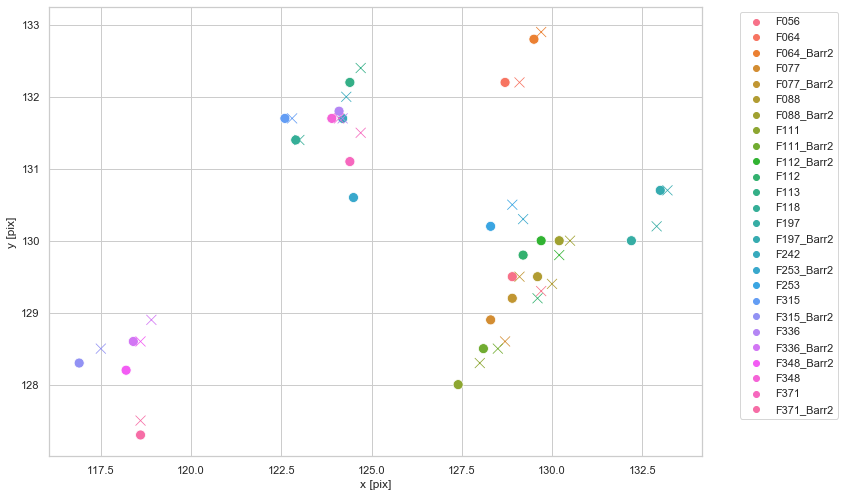

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
sns_plot = sns.scatterplot(x='cd_x', y='cd_y', data=df, hue='instcfgs', marker='o',s=100)
sns_plot = sns.scatterplot(x='comp_x', y='comp_y', data=df, hue='instcfgs', marker='x', legend=False,s=100)
sns_plot.set(xlabel = 'x [pix]', ylabel = 'y [pix]')
handles, labels = sns_plot.get_legend_handles_labels()
lgd = sns_plot.legend(bbox_to_anchor=(1.05, 1), loc=2, handles=handles[1:], labels=labels[1:])


In [11]:
fig = sns_plot.get_figure()
fig.savefig(plot_name, bbox_extra_artists=(lgd,), bbox_inches='tight')


### Calculate the RMS for the shift
Here you get the RMS for the shifts in x and y direction. Note also the direction of the shifts.

In [12]:
x_offset = df['cd_x_offset']-df['comp_x_offset']
print(x_offset)
round(np.sqrt(np.mean(x_offset**2)),2)

0    -0.8
1    -0.4
2    -0.2
3    -0.4
4    -0.2
5    -0.4
6    -0.3
7    -0.6
8    -0.4
9    -0.5
10   -0.4
11   -0.3
12   -0.1
13   -0.7
14   -0.2
15   -0.1
16   -4.7
17   -0.6
18   -0.2
19   -0.6
20   -0.1
21   -0.5
22   -0.4
23   -0.2
24   -0.3
25    0.0
dtype: float64


1.0

In [13]:
y_offset = df['cd_y_offset']-df['comp_y_offset']
print(y_offset)
round(np.sqrt(np.mean(y_offset**2)),2)

0     2.000000e-01
1     0.000000e+00
2    -1.000000e-01
3     3.000000e-01
4    -3.000000e-01
5     1.000000e-01
6     0.000000e+00
7    -3.000000e-01
8     0.000000e+00
9     2.000000e-01
10    6.000000e-01
11   -2.000000e-01
12    4.440892e-16
13   -2.000000e-01
14    4.440892e-16
15   -3.000000e-01
16    3.000000e-01
17   -3.000000e-01
18    4.440892e-16
19   -2.000000e-01
20    1.000000e-01
21   -3.000000e-01
22   -4.000000e-01
23    4.440892e-16
24   -4.000000e-01
25   -2.000000e-01
dtype: float64


0.25